<hr/>

# Data import from chemistry and especies

In [6]:
import pandas as pd
import numpy as np
datostemp = pd.read_csv('datosquimica.csv',index_col=0)
datosquimica = datostemp.T
datosquimica.index

Index([u'Units', u'S1-01', u'S1-02', u'S1-03', u'S1-04', u'S1-05', u'S2-01',
       u'S2-02', u'S2-03', u'S2-04', u'S2-05', u'S2-06', u'S2-07', u'S2-08',
       u'S3-01', u'S3-02', u'S3-03', u'S3-04', u'S3-05'],
      dtype='object')

In [7]:
datosespecies = pd.read_csv('datosespecies.csv',index_col=0)
datosespecies.index.tolist()

['S2-01',
 'S2-02',
 'S2-03',
 'S2-04',
 'S2-05',
 'S2-06',
 'S2-07',
 'S2-08',
 'S1-01',
 'S1-03',
 'S1-05',
 'S3-02',
 'S3-03',
 'S3-04']

<hr/>

# Generate a dataframe of chemistry with the same index as species

In [8]:
setquimica = datosquimica.reindex(datosespecies.index.tolist()).as_matrix()
setquimica[:5,:5]

array([[8.02, 92.9, 7.43, 10.5, 16.9],
       [7.51, 97.7, 7.12, 11.7, 34.9],
       [7.23, 104.2, 4.54, 19.2, 28.1],
       [7.48, 109.8, 3.47, 17.1, 23.3],
       [7.15, 80.6, 8.22, 17.2, 25.6]], dtype=object)

<hr/>

# Chemistry data normalization

In [9]:
import numpy as np
promedio_filas = setquimica.mean(axis=0)
suma_filas = setquimica.sum(axis=0)
setquimica_org = setquimica
setquimica_suma = setquimica / suma_filas[np.newaxis,:]
setquimica_mean = setquimica / promedio_filas[np.newaxis,:]
print setquimica_org[:3,:3]
print setquimica_suma[:3,:3]
print setquimica_mean[:3,:3]

setquimica.shape

[[8.02 92.9 7.43]
 [7.51 97.7 7.12]
 [7.23 104.2 4.54]]
[[0.07623574144486693 0.06567227484801358 0.08487548549234633]
 [0.07138783269961978 0.06906546020076347 0.0813342472012794]
 [0.06872623574144487 0.07366039869927896 0.05186200594014164]]
[[1.067300380228137 0.9194118478721902 1.1882567968928486]
 [0.9994296577946769 0.9669164428106887 1.1386794608179116]
 [0.9621673003802284 1.0312455817899053 0.7260680831619829]]


(14, 12)

<hr/>

# Define a function of neural networks

In [10]:
from sknn.mlp import Regressor, Layer
def MLP(setquimica,setespecies,neurones,learnrate,niterac):
    valor = ([])
    redneural = Regressor(
        layers=[
            Layer("Rectifier", units=neurones),
            Layer("Linear")],
        learning_rate=learnrate,
        n_iter=niterac)
    redneural.fit(setquimica, setespecies)
    for i in range(setquimica.shape[0]):
        prediccion = redneural.predict(np.array([setquimica[i,:].tolist()]))
        valor.append(prediccion[0][0])
    return valor

<hr />

# Create an interactive plot

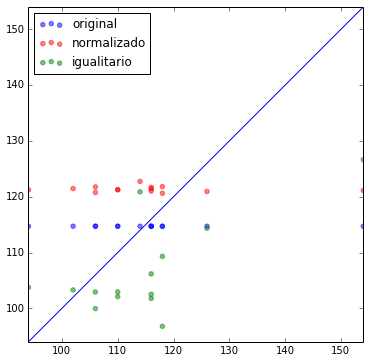

In [11]:
%pylab inline
import matplotlib.pyplot as plt
from ipywidgets import widgets 

def grupored(neurones,learnrate,niterac,especie):
    setespecies = datosespecies.as_matrix()[:,especie]
    original = MLP(setquimica_org,setespecies,neurones,learnrate,niterac)
    normalizado = MLP(setquimica_suma,setespecies,neurones,learnrate,niterac)
    igualitario = MLP(setquimica_mean,setespecies,neurones,learnrate,niterac)
    plt.figure(figsize=(6,6))
    plt.scatter(setespecies, original, color='blue',alpha=0.5,label='original')
    plt.scatter(setespecies, normalizado, color='red',alpha=0.5,label='normalizado')
    plt.scatter(setespecies, igualitario, color='green',alpha=0.5,label='igualitario')
    plt.plot([0,2000], [0,2000])
    xlim(setespecies.min(),setespecies.max())
    ylim(setespecies.min(),setespecies.max())
    plt.legend(loc=2)
    return plt.show()

widgets.interact(grupored,neurones=(1,1000,200),learnrate=(0.00002,0.0008,0.00004)
                 ,niterac=(1,10000,100),especie=1)